In [43]:
"""
Created on Thu Jul  4 12:00:18 2019

@author: DataLoungeUser
"""

import numpy as np
import pandas as pd
import seaborn as sns
#import plotly
#%matplotlib inline
#import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split

## 1. Read Data

In [44]:


style.use('fivethirtyeight')

df1 = pd.read_csv("hour.csv")



   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   

## 2. EDA

In [ ]:
print (df1.head())
df = df1.drop(['dteday'], axis=1)
print (df.head())

In [45]:
df.info()

df.head()

df.shape
df_A,df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train,df_val = train_test_split(df_A, test_size=0.20, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


In [46]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(8,2,i)
        plt.plot(df[col],df["cnt"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

16


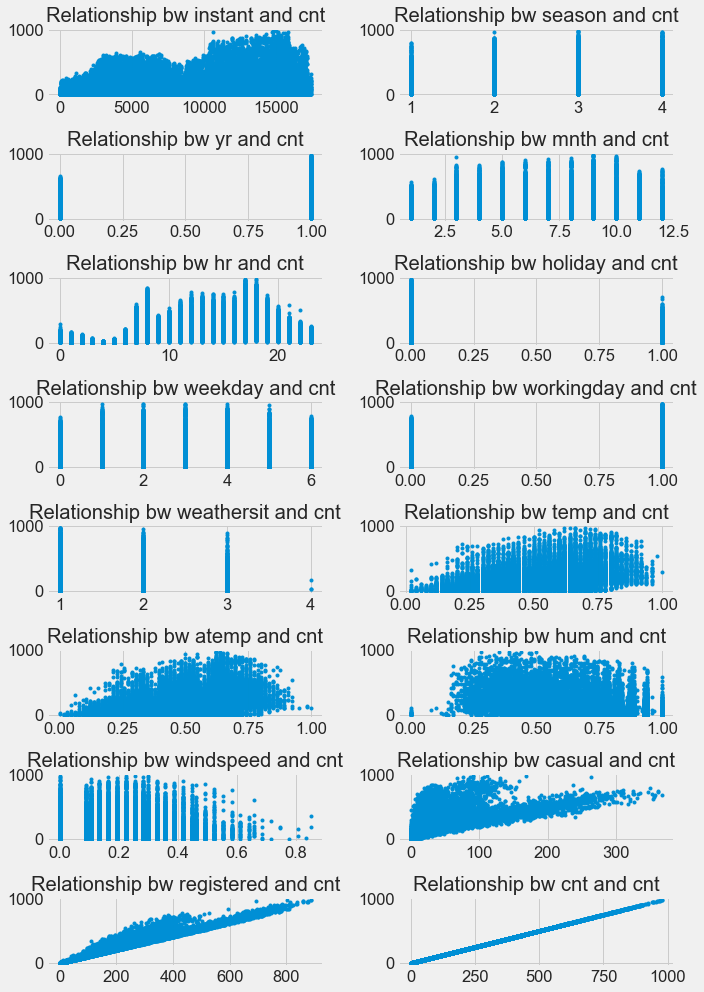

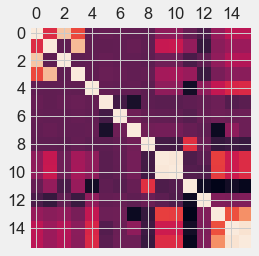

In [47]:

#colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'registered', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

colnames = df.columns

plotFeatures(colnames,"Relationship bw %s and cnt")


plt.matshow(df.corr())

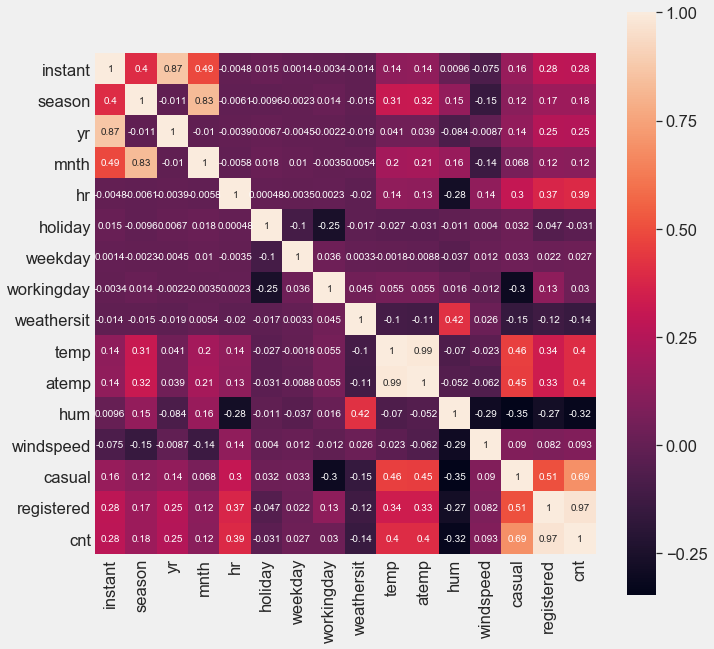

In [48]:

fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()



## 3. Split train and test

In [ ]:
'''prepare the test data'''

predictor_test = df_test["registered"]
x_test = np.column_stack((np.ones(len(predictor_test)),predictor_test))
Y_test = df_test["cnt"]  

In [ ]:

def predictPrice(x,theta):
    return np.dot(x,theta)




In [50]:
def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

In [51]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
#    plt.xlim(-20, 20)
#    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x[:,-1],Y,'.',x[:,-1], y_vals, '-.')
    plt.gca().legend(('Data','Regressor'))
    plt.show()
     
    

In [52]:
def loss_plot(x,costs_train,costs_val):
    '''plot the loss inforegisteredation'''
    plt.xlabel('No. of iteration')
    plt.ylabel('Loss')
    plt.plot(x,costs_train,'.',x, costs_val, '-.')
    plt.gca().legend(('Train','Val'))
    plt.show()

In [ ]:
## 5. Train the model

In [53]:
def gradientDescentLinearRegression(alpha=0.01,iter=20000,theta=[]):
    '''initialized the values'''
    prev_val = 1
    counter =0
    if any(theta):
        theta = theta
    else :
        theta = np.zeros(2)
#    else:
#        theta = np.zeros(2)
        
    theta0 = []
    theta1 = []
        
    costs_train = []
    costs_val = []
    
    '''provide the training inforegisteredation'''
    predictor = df_train["registered"]
    x_train = np.column_stack((np.ones(len(predictor)),predictor))
    Y_train = df_train["cnt"]
    
    
    
    '''provide the validation inforegisteredation'''
    predictor_val = df_val["registered"]
    x_val = np.column_stack((np.ones(len(predictor_val)),predictor_val))
    Y_val = df_val["cnt"]
     
    '''Do for number of iter'''
    for i in range(iter):
        '''do the prediction'''
        pred = predictPrice(x_train,theta)
        '''' correct the gradient '''
        t0 = theta[0] - alpha *(pred - Y_train).mean()
        t1 = theta[1] - alpha *((pred - Y_train)* x_train[:,1]).mean()
        theta = np.array([t0,t1])
        
        ''' training loss '''
        J_train = calculateCost(x_train,theta,Y_train)
        theta0.append(t0)
        theta1.append(t1)
        costs_train.append(J_train)
        '''validation loss'''
        J_val = calculateCost(x_val,theta,Y_val)
        costs_val.append(J_val)
        if i%10==0:
            print(f"Iteration: {i+1},Cost = {J_train},theta = {theta}")
            
            print(f"Iteration: {i+1},Cost_val = {J_val},theta = {theta}")
            
            abline(x_train,theta,Y_train)
        if J_val>prev_val:
            counter +=1   #counter = counter + 1
            prev_val = J_val
        else:
            counter = 0
            prev_val = J_val
            
        '''check the teregisteredination condition''' 
        if counter>10:
            print ("teregisteredinated")
            print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs_train)}')
            print ( J_val,prev_val,counter,i)
            return costs_val,costs_train,theta,i+1
        
#            abline(x_train,theta,Y_train)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs_train)}')
    return costs_val,costs_train,theta,iter

Iteration: 1,Cost = 31665.033643392395,theta = [0.00019026 0.05644416]
Iteration: 1,Cost_val = 31605.202820152874,theta = [0.00019026 0.05644416]


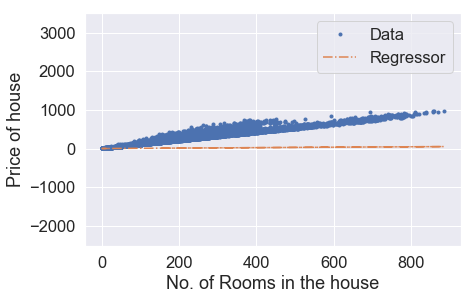

Iteration: 11,Cost = 12652.796170172403,theta = [0.00167533 0.49353986]
Iteration: 11,Cost_val = 12677.482808797164,theta = [0.00167533 0.49353986]


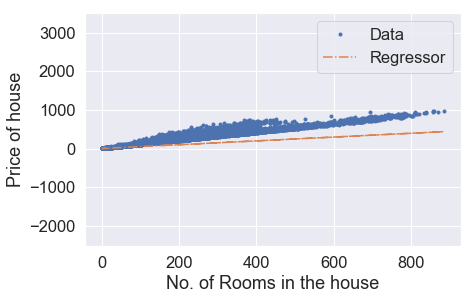

Iteration: 21,Cost = 5406.449308032753,theta = [0.00261198 0.76338796]
Iteration: 21,Cost_val = 5446.1850663885425,theta = [0.00261198 0.76338796]


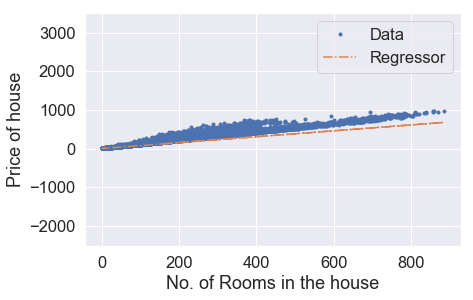

Iteration: 31,Cost = 2644.567921110174,theta = [0.00321007 0.92998303]
Iteration: 31,Cost_val = 2679.4430726461064,theta = [0.00321007 0.92998303]


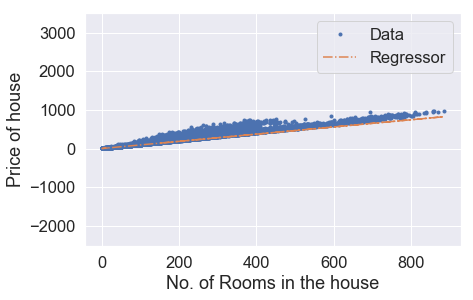

Iteration: 41,Cost = 1591.901013836467,theta = [0.00359913 1.03283315]
Iteration: 41,Cost_val = 1618.3817044880955,theta = [0.00359913 1.03283315]


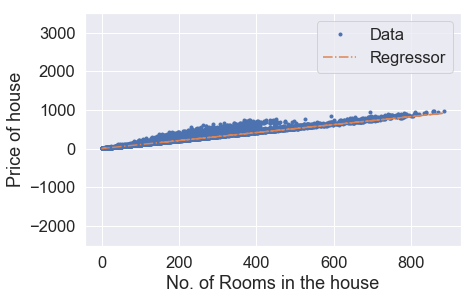

Iteration: 51,Cost = 1190.6861365964005,theta = [0.00385914 1.09632929]
Iteration: 51,Cost_val = 1209.9286178001682,theta = [0.00385914 1.09632929]


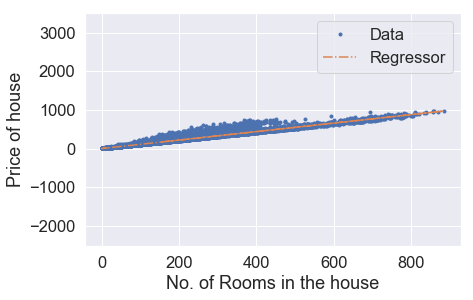

Iteration: 61,Cost = 1037.766457232216,theta = [0.00403949 1.1355296 ]
Iteration: 61,Cost_val = 1051.7567827266662,theta = [0.00403949 1.1355296 ]


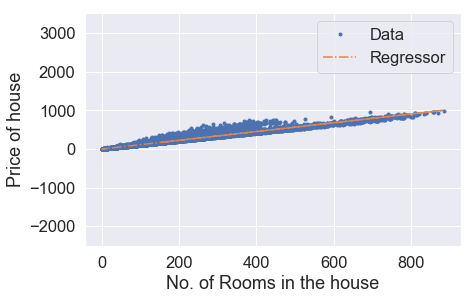

Iteration: 71,Cost = 979.4823035040392,theta = [0.00417066 1.15973049]
Iteration: 71,Cost_val = 989.9314919323458,theta = [0.00417066 1.15973049]


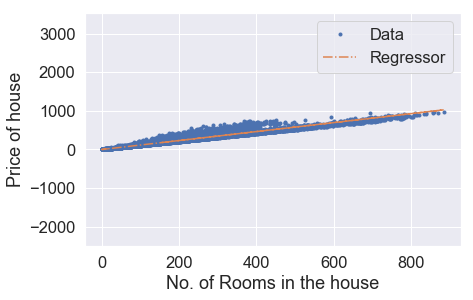

Iteration: 81,Cost = 957.2676460418833,theta = [0.00427146 1.17467123]
Iteration: 81,Cost_val = 965.4168361093924,theta = [0.00427146 1.17467123]


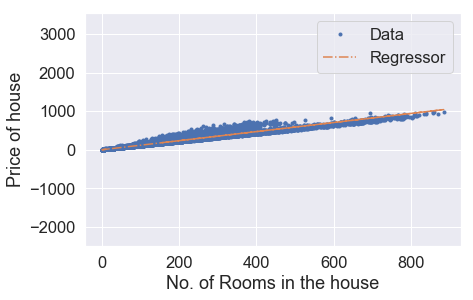

Iteration: 91,Cost = 948.8005590849549,theta = [0.00435352 1.18389508]
Iteration: 91,Cost_val = 955.4864277886835,theta = [0.00435352 1.18389508]


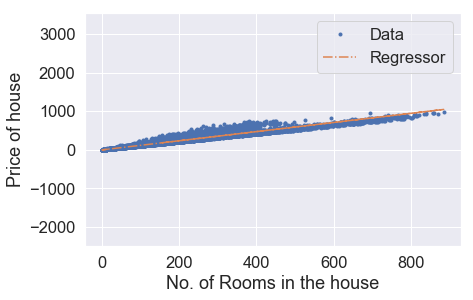

theta0 = 100
theta1 = 100
Costs = 100


In [54]:

  
costs_val,costs_train,theta,iteration  = gradientDescentLinearRegression(alpha=1e-6,iter=100)


## 6. Test the model

In [56]:

'''Calculate the loss for test data'''
J_test = calculateCost(x_test,theta,Y_test)
print(f"Cost_test = {J_test}")

Cost_test = 871.2733055884173


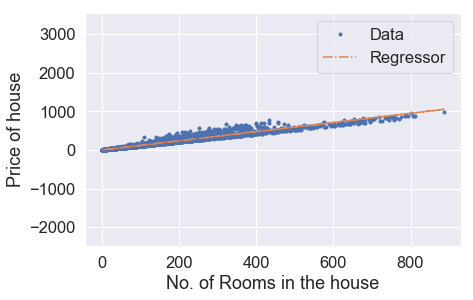

In [57]:
'''plot the test data'''
abline(x_test,theta,Y_test)

In [58]:
''' create range of iteration'''
iteration_range=list(range(0, iteration))

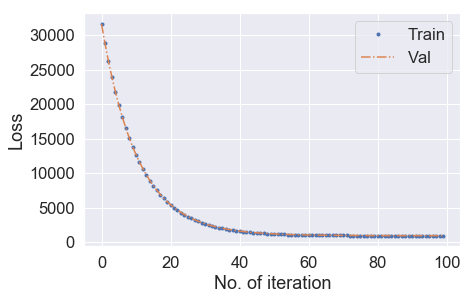

In [59]:
'''plot loss'''
loss_plot(iteration_range,costs_train,costs_val)

Iteration: 1,Cost = 944.1983764939171,theta = [0.00448403 1.19367529]
Iteration: 1,Cost_val = 949.2964664966134,theta = [0.00448403 1.19367529]


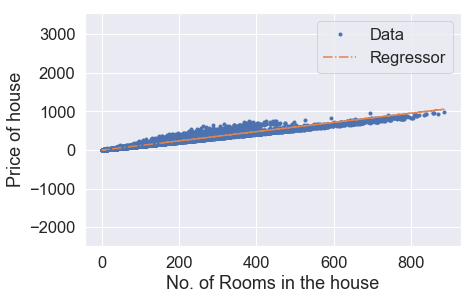

Iteration: 11,Cost = 943.5828443258627,theta = [0.0050188  1.19876692]
Iteration: 11,Cost_val = 947.8393785587335,theta = [0.0050188  1.19876692]


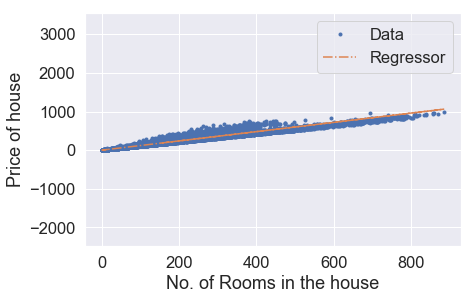

Iteration: 21,Cost = 943.580158726267,theta = [0.00553688 1.19877399]
Iteration: 21,Cost_val = 947.8352823482535,theta = [0.00553688 1.19877399]


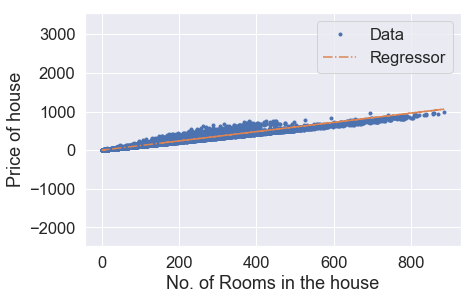

Iteration: 31,Cost = 943.5774752071014,theta = [0.00605491 1.19877231]
Iteration: 31,Cost_val = 947.8326429000826,theta = [0.00605491 1.19877231]


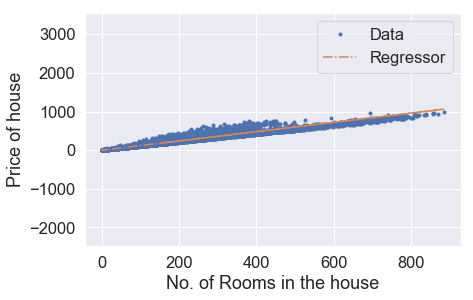

Iteration: 41,Cost = 943.5747919529167,theta = [0.00657291 1.19877061]
Iteration: 41,Cost_val = 947.8300062155548,theta = [0.00657291 1.19877061]


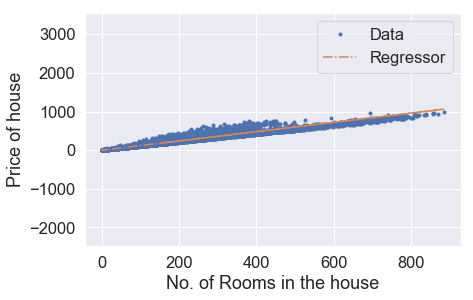

Iteration: 51,Cost = 943.5721089636895,theta = [0.00709088 1.19876891]
Iteration: 51,Cost_val = 947.8273697952372,theta = [0.00709088 1.19876891]


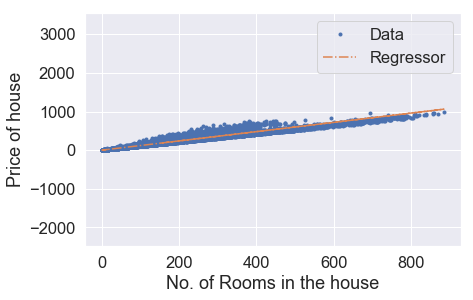

Iteration: 61,Cost = 943.5694262394012,theta = [0.00760883 1.19876721]
Iteration: 61,Cost_val = 947.8247336348111,theta = [0.00760883 1.19876721]


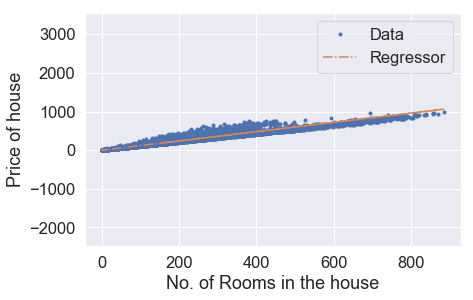

Iteration: 71,Cost = 943.5667437800263,theta = [0.00812675 1.19876551]
Iteration: 71,Cost_val = 947.8220977342376,theta = [0.00812675 1.19876551]


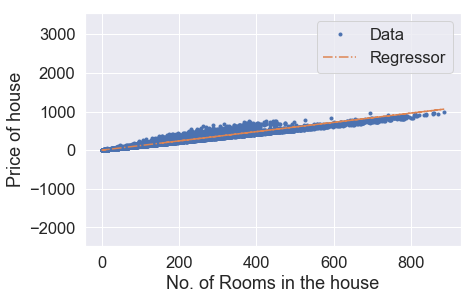

Iteration: 81,Cost = 943.5640615855239,theta = [0.00864465 1.19876381]
Iteration: 81,Cost_val = 947.8194620934962,theta = [0.00864465 1.19876381]


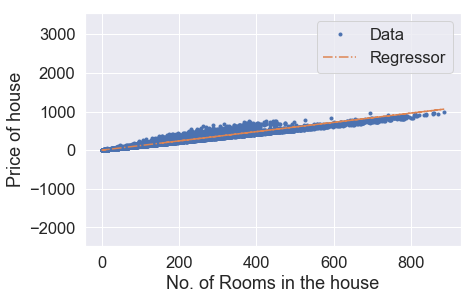

Iteration: 91,Cost = 943.5613796558774,theta = [0.00916252 1.19876212]
Iteration: 91,Cost_val = 947.8168267125566,theta = [0.00916252 1.19876212]


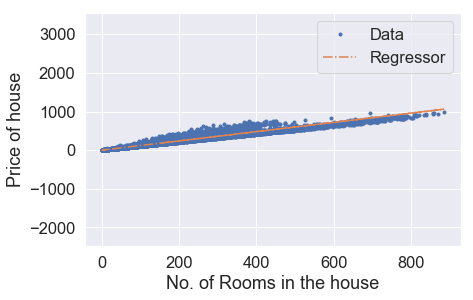

theta0 = 100
theta1 = 100
Costs = 100


In [60]:
'''use the saved weight'''
costs_val,costs_train,theta,iteration  = gradientDescentLinearRegression(alpha=1e-5,iter=100, theta=theta)


In [61]:
'''Calculate the loss for test data'''
J_test = calculateCost(x_test,theta,Y_test)
print(f"Cost_test = {J_test}")

Cost_test = 869.8882267157873


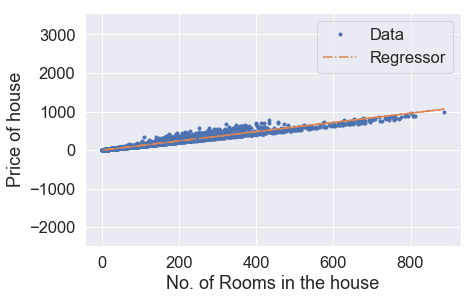

In [62]:
'''plot the test data'''
abline(x_test,theta,Y_test)

In [63]:
''' create range of iteration'''
iteration_range=list(range(0, iteration))

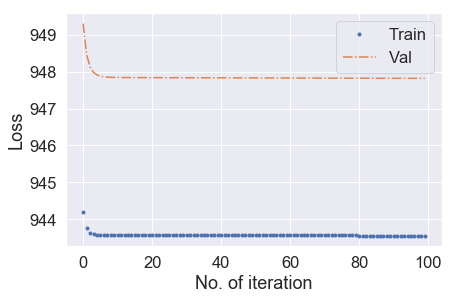

In [64]:
'''plot loss'''
loss_plot(iteration_range,costs_train,costs_val)